In [4]:
import pandas as pd
import numpy as np
import os

In [1]:
# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)
pd.options.plotting.backend = "plotly"

ModuleNotFoundError: No module named 'seaborn'

In [7]:
df = pd.read_csv(
    "../Phase 1 Trial (Dec 2021)/All-CGM-2-Data.csv",
    parse_dates={'date-time': ['date','time']},
    index_col ="date-time"
)

df.drop(['device', 'serial number'], axis=1, inplace=True)

In [8]:
df.plot()

In [9]:
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

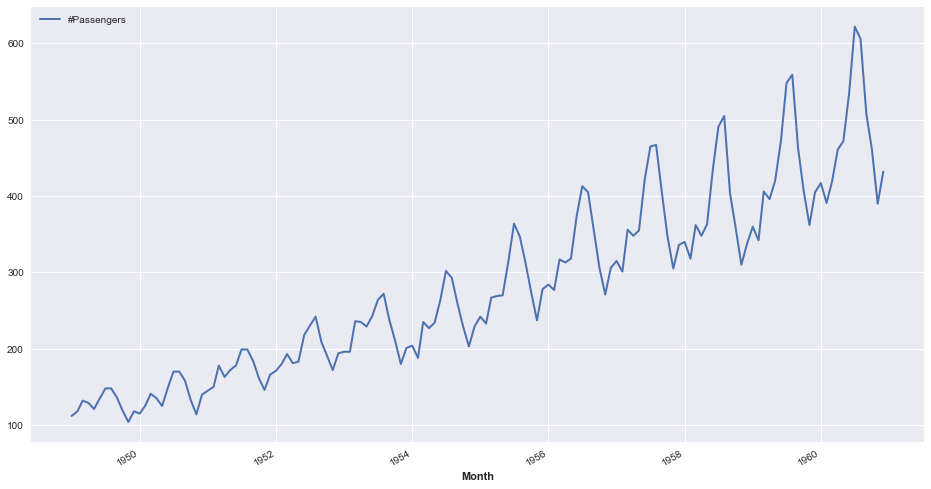

In [10]:
series = AirPassengersDataset().load()
series.plot()

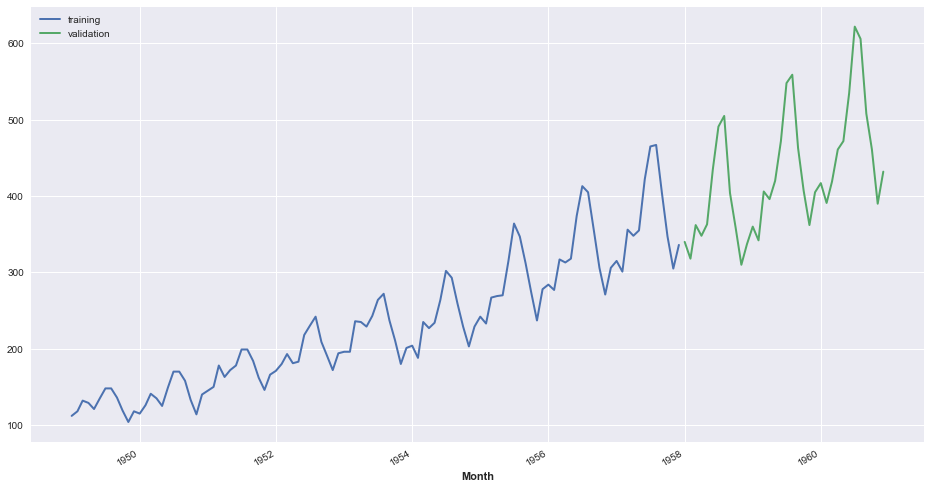

In [11]:
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")

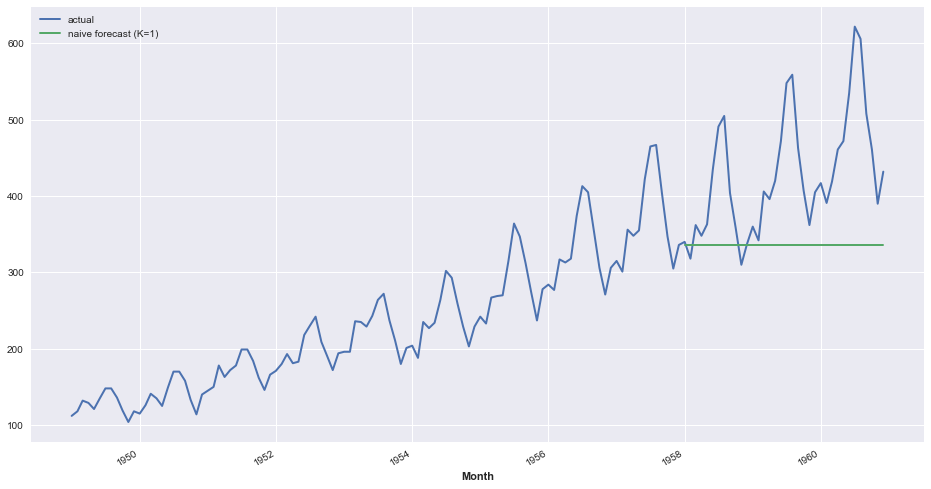

In [12]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

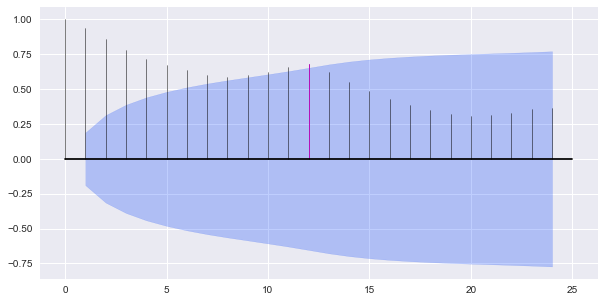

In [13]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

In [14]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 12.


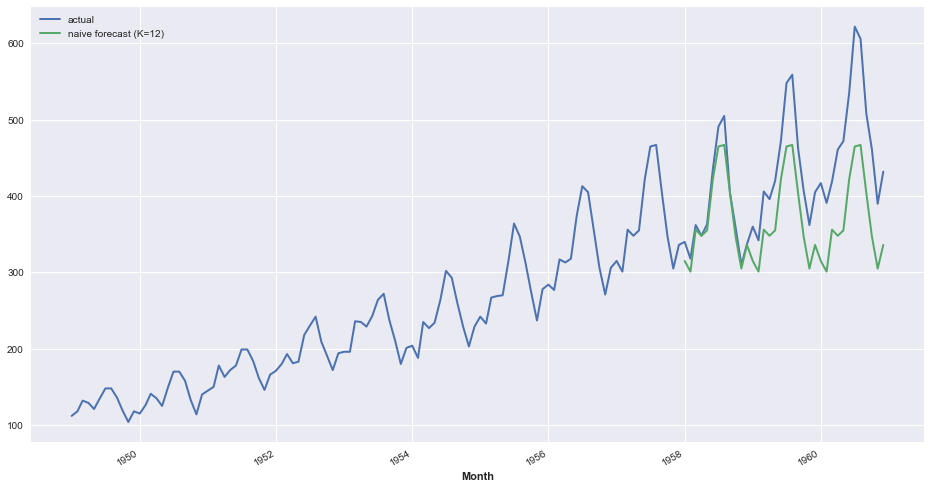

In [15]:
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=12)")

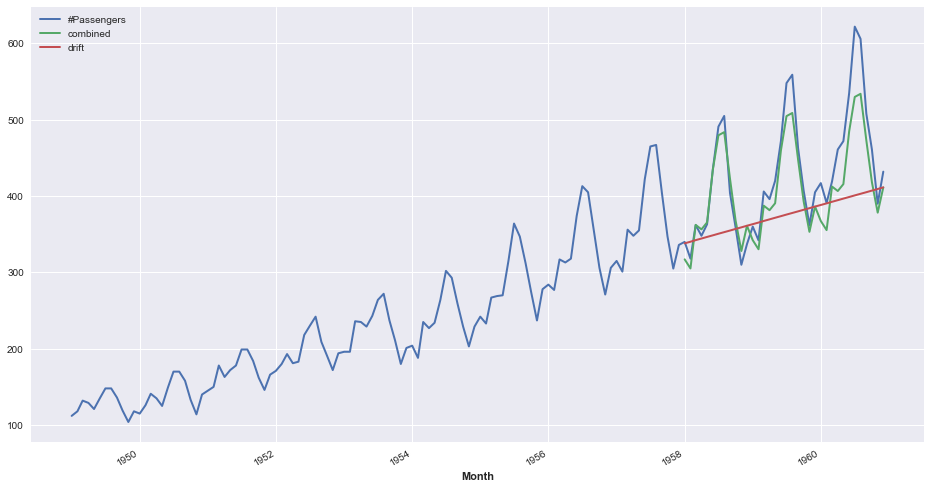

In [16]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

In [17]:
from darts.metrics import mape

print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(series, combined_forecast)
    )
)



Mean absolute percentage error for the combined naive drift + seasonal: 5.66%.


In [18]:
from darts.models import ExponentialSmoothing, Prophet, AutoARIMA, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))


eval_model(ExponentialSmoothing())
eval_model(Prophet())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 5.11%


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\itsda\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\itsda\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\itsda\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



model Prophet obtains MAPE: 9.78%
model Auto-ARIMA obtains MAPE: 11.65%
model Theta(2) obtains MAPE: 8.15%


In [2]:
import pmdarima as pm

o = pm.AutoARIMA(trace=True)
o.fit(y=[1,2,3,4,5])

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20.227, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21.655, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21.085, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28.179, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.421 seconds


AutoARIMA(trace=True)

In [6]:
from sklearn.decomposition import PCA

reshaped_data = data.reshape((1000*300, 20))    # create one big data panel with 20 series and 300.000 datapoints
n_comp=10                                       #choose the number of features to have after dimensionality reduction
pca = PCA(n_components=n_comp)                  #create the pca object       
pca.fit(pre_data)                               #fit it to your transformed data
transformed_data=np.empty([1000,300,n_comp])
for i in range(len(data)):
     transformed_data[i]=pca.transform(data[i])  

NameError: name 'pre_data' is not defined

In [3]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

Test RMSE: 1258.625


Text(0.5, 0, 'Year')

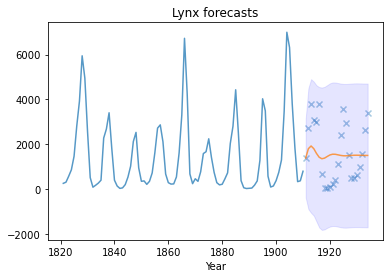

In [8]:
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1821  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Lynx forecasts")
plt.xlabel("Year")

In [3]:
!python -m pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [5]:
!python -m pip install prophet

^C
  Using cached prophet-1.0.1.tar.gz (65 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.13-py3-none-any.whl (172 kB)
  Running setup.py clean for prophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730973 sha256=17b1d636bf4acd3cb25611f73f83a213017531b3ea5f389b4367c7ba1a8e26ef
  Stored in directory: c:\users\itsda\appdata\local\pip\cache\wheels\33\3d\82\4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
  Running setup.py clean for pystan
Successfully built pymeeus
Failed to build prophet pystan


  ERROR: Command errored out with exit status 1:
   command: 'C:\Python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\itsda\\AppData\\Local\\Temp\\pip-install-eunrk6ln\\prophet_808f21c6779e4573a864f586506f5aa4\\setup.py'"'"'; __file__='"'"'C:\\Users\\itsda\\AppData\\Local\\Temp\\pip-install-eunrk6ln\\prophet_808f21c6779e4573a864f586506f5aa4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\itsda\AppData\Local\Temp\pip-wheel-64xe6e_5'
       cwd: C:\Users\itsda\AppData\Local\Temp\pip-install-eunrk6ln\prophet_808f21c6779e4573a864f586506f5aa4\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\prophet
  c

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

ModuleNotFoundError: No module named 'seaborn'